In [ ]:
pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")
data.head()

Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.drop(columns = 'CustomerID', inplace=True)

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
print("Min Age: ", data['Age'].min())
print("Max Age: ", data['Age'].max())

Min Age:  18
Max Age:  70


In [ ]:
data['age_bins'] = pd.cut(data.Age, bins=(17, 35, 50, 70), labels= ['17-35', '36-50', '51-70'] )

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_bins
0,Male,19,15,39,17-35
1,Male,21,15,81,17-35
2,Female,20,16,6,17-35
3,Female,23,16,77,17-35
4,Female,31,17,40,17-35


In [ ]:
num_cols=data.select_dtypes(include=['int64']).columns
ctg_cols=data.select_dtypes(include=['object']).columns

print('Numerical Cols=',num_cols)
print('Categorical Cols=',ctg_cols)

Numerical Cols= Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Categorical Cols= Index(['Gender'], dtype='object')


<ipython-input-18-6c218c17cc57>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax[i,j],color=colours_val[i+j])
<ipython-input-18-6c218c17cc57>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax[i,j],color=colours_val[i+j])
<ipython-input-18-6c218c17cc57>:12: UserWa

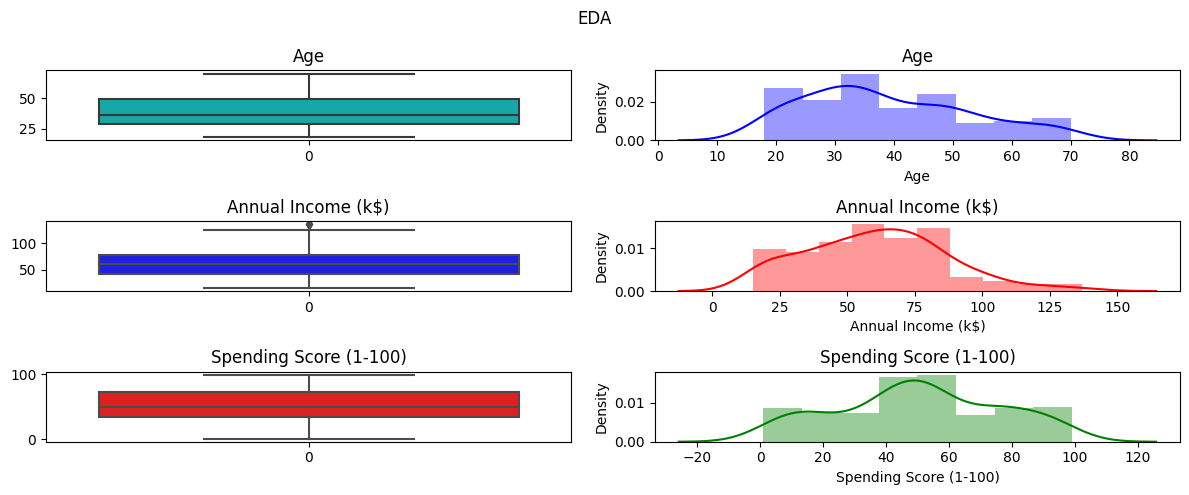

In [ ]:
cols_val=2
fig, ax = plt.subplots(len(num_cols),cols_val,figsize=(12, 5))
colours_val=['c','b','r','g','y','p','m']
did_not_ran=True
for i,col in enumerate(num_cols):
    for j in range(cols_val):
        if did_not_ran==True:
            sns.boxplot(data[col],ax=ax[i,j],color=colours_val[i+j])
            ax[i,j].set_title(col)
            did_not_ran=False
        else:
            sns.distplot(data[col],ax=ax[i,j],color=colours_val[i+j])
            ax[i,j].set_title(col)
            did_not_ran=True


plt.suptitle("EDA")
plt.tight_layout()
plt.show()

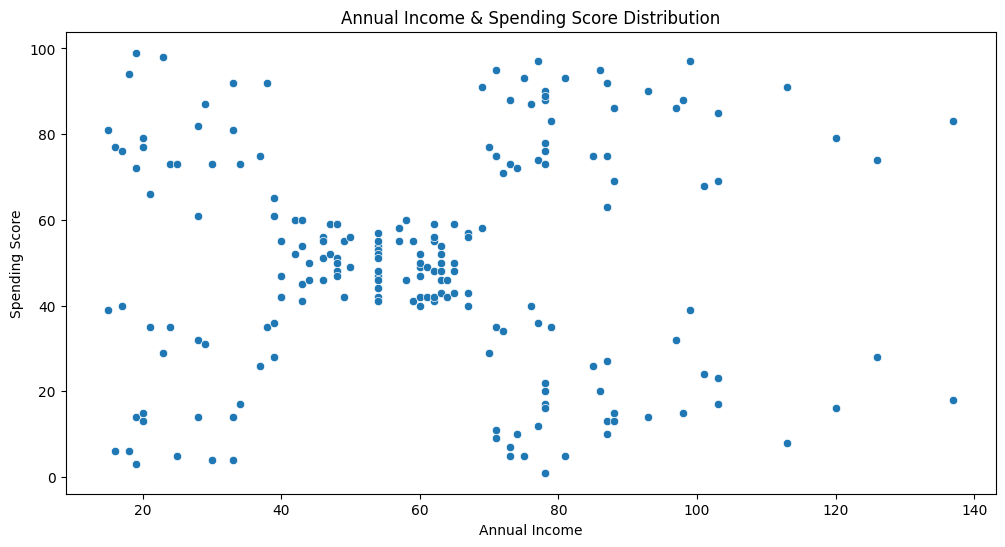

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income & Spending Score Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [ ]:
df1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
std = MinMaxScaler()
arr1 = std.fit_transform(df1)

In [ ]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


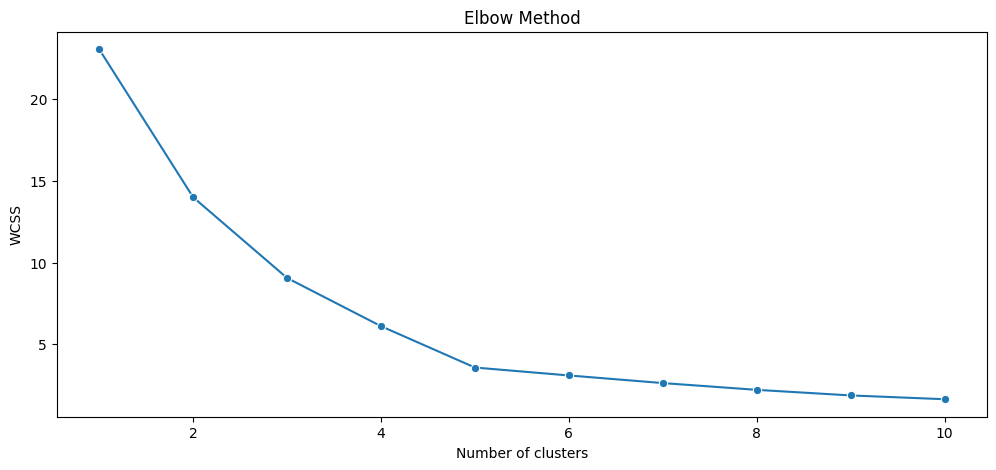

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans_cluster=KMeans(n_clusters=5,random_state=0)
result_cluster=kmeans_cluster.fit_predict(arr1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['cluster'] = result_cluster

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_bins,cluster
0,Male,19,15,39,17-35,4
1,Male,21,15,81,17-35,3
2,Female,20,16,6,17-35,4
3,Female,23,16,77,17-35,3
4,Female,31,17,40,17-35,4


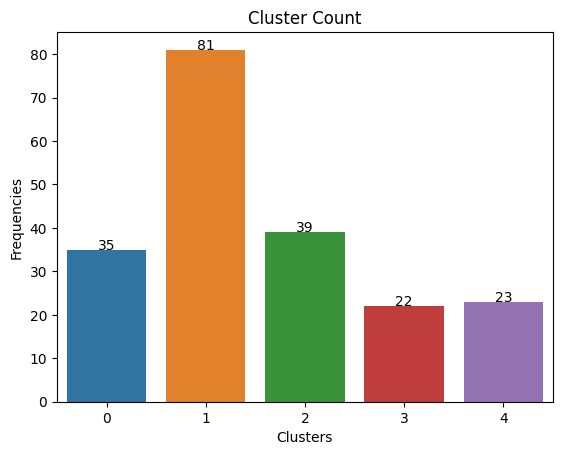

In [ ]:
ax =sns.countplot(x=data.cluster)
for index, row in pd.DataFrame(data['cluster'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
plt.xlabel('Clusters')
plt.ylabel('Frequencies')
plt.title('Cluster Count');

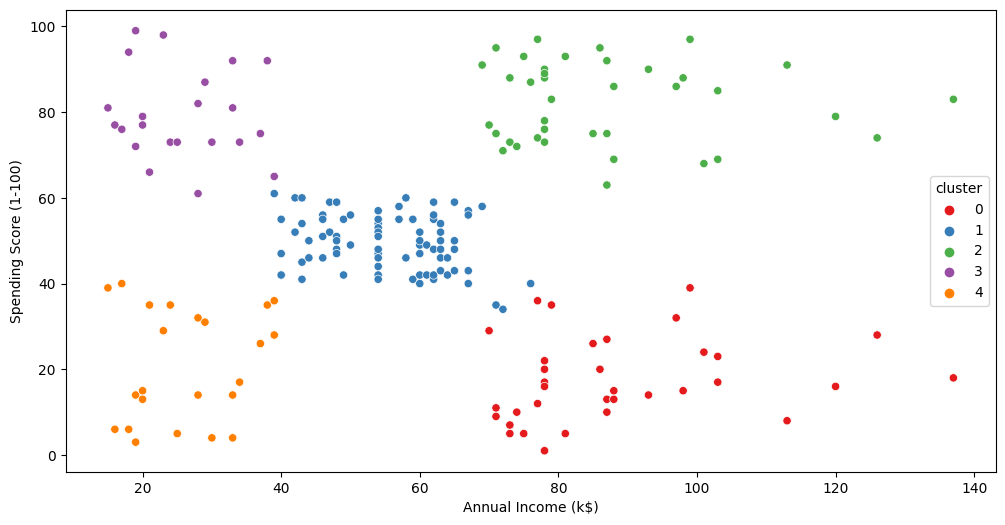

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Annual Income (k$)'], y =data['Spending Score (1-100)'],
                hue = data['cluster'], palette='Set1'
               );

In [ ]:
df_proto = pd.DataFrame(arr1, columns = ['Annual Income', 'Spending Score'])
df_proto.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [ ]:
df_cat = data[['Gender', 'age_bins']]

In [ ]:
df2 = pd.concat([df_proto, df_cat], axis = 1)

In [ ]:
df2.head()

,Annual Income,Spending Score,Gender,age_bins
0,0.000000,0.387755,Male,17-35
1,0.000000,0.816327,Male,17-35
2,0.008197,0.051020,Female,17-35
3,0.008197,0.775510,Female,17-35
4,0.016393,0.397959,Female,17-35


In [ ]:
kproto_cluster = KPrototypes(n_clusters=5, random_state=42, init = 'Huang')
result_cluster = kproto_cluster.fit_predict(df2, categorical = [2,3])

In [ ]:
df2['clusters'] = result_cluster
df2['clusters'].value_counts()

4    59
2    48
1    39
0    35
3    19
Name: clusters, dtype: int64

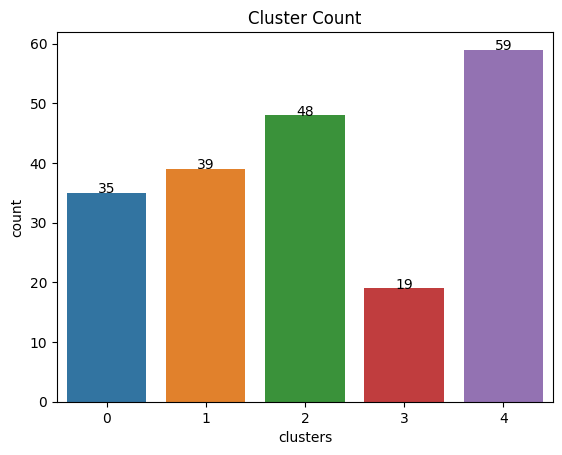

In [ ]:
ax = sns.countplot(x = df2['clusters'])
for index, row in pd.DataFrame(df2['clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [ ]:
kproto_cluster.cluster_centroids_

array([['0.23419203747072587', '0.38104956268221574', 'Male', '51-70'],
       ['0.39680538041193786', '0.7299843014128727', 'Male', '17-35'],
       ['0.3936133879781422', '0.3352465986394558', 'Female', '36-50'],
       ['0.5953408110440034', '0.12083780880773363', 'Male', '17-35'],
       ['0.35273687135315357', '0.681598062953995', 'Female', '17-35']],
      dtype='<U32')

In [ ]:
df3 = pd.concat([df1,df2], axis=1)

In [ ]:
df3.head()

,Annual Income (k$),Spending Score (1-100),Annual Income,Spending Score,Gender,age_bins,clusters
0,15,39,0.000000,0.387755,Male,17-35,0
1,15,81,0.000000,0.816327,Male,17-35,1
2,16,6,0.008197,0.051020,Female,17-35,2
3,16,77,0.008197,0.775510,Female,17-35,4
4,17,40,0.016393,0.397959,Female,17-35,4


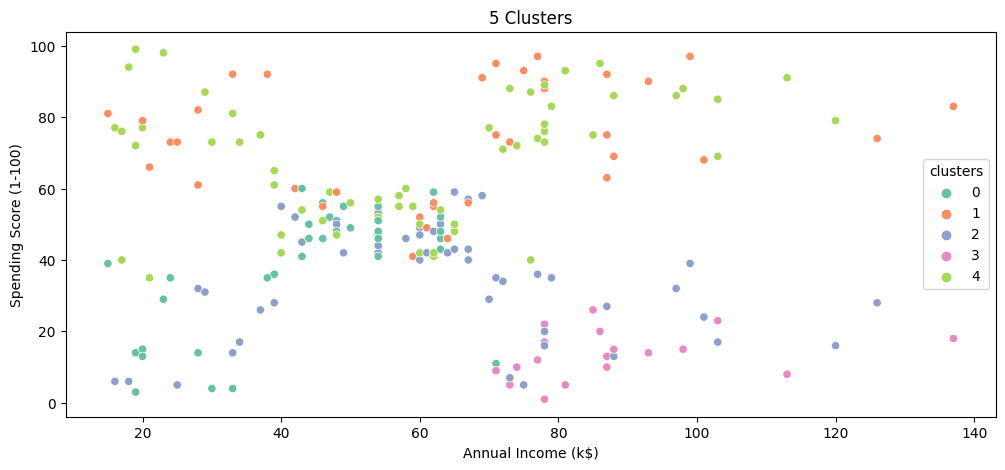

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],hue=df3.clusters,palette="Set2",)
plt.title('5 Clusters')
plt.show()

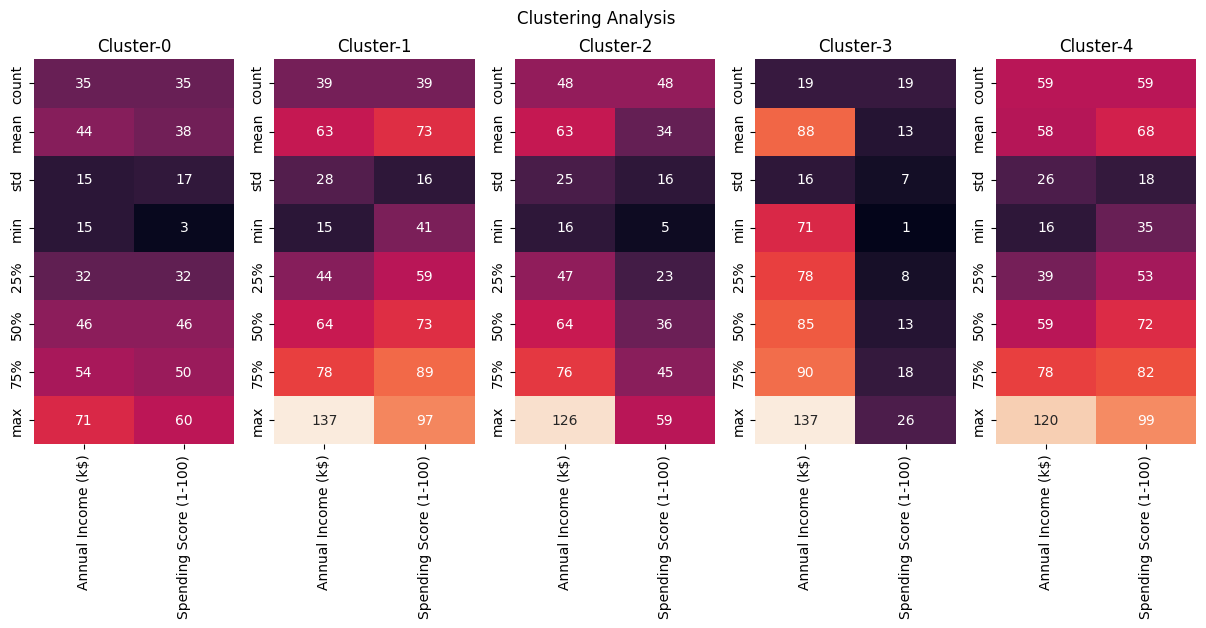

In [ ]:
fig,ax=plt.subplots(1,5,figsize=(15,5))
#cbar_ax = fig.add_axes([1.03, .3, .03, .4])
for cluster_val in sorted(df3.clusters.unique()):
    #print(cluster_val)
    sns.heatmap(df3.loc[df3.clusters==cluster_val,['Annual Income (k$)', 'Spending Score (1-100)']].describe().round(), annot=True, fmt='g', ax=ax[cluster_val],
               cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)
    ax[cluster_val].set_title(titl)


plt.suptitle('Clustering Analysis')

plt.show()

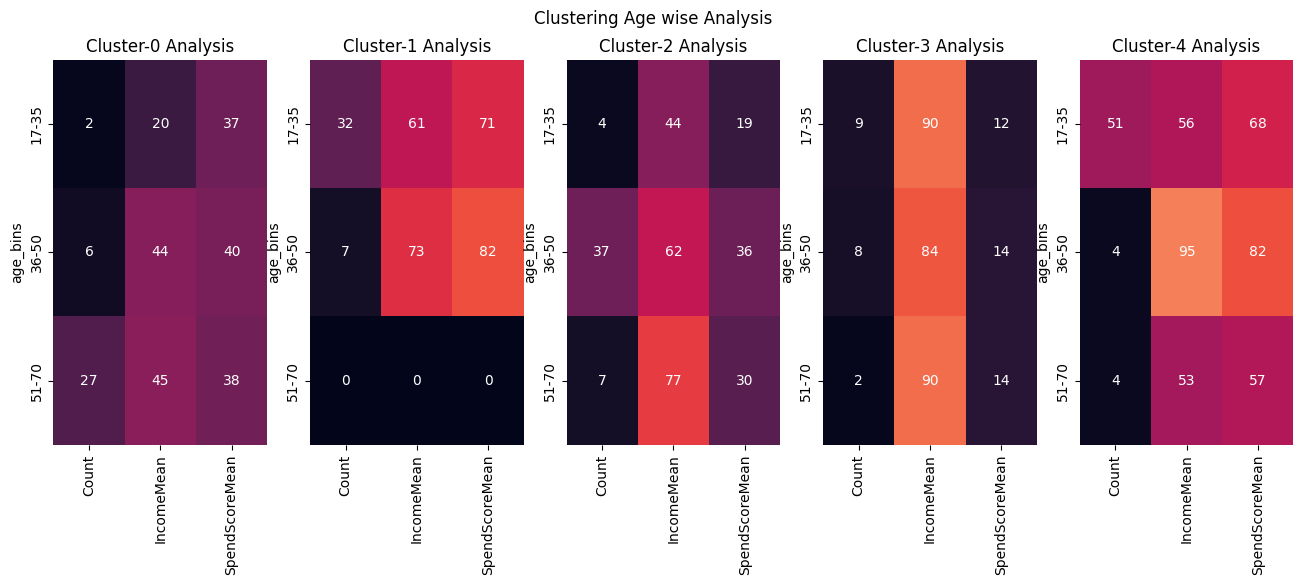

In [ ]:
fig,ax=plt.subplots(1,5,figsize=(16,5))

for cluster_val in sorted(df3.clusters.unique()):

    sns.heatmap(df3.loc[df3.clusters==cluster_val,:].groupby('age_bins').agg({'clusters':'size','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).\
    rename(columns={'clusters':'Count','Annual Income (k$)':'IncomeMean','Spending Score (1-100)':'SpendScoreMean'})\
                .fillna(0).round(),annot=True,fmt='g',ax=ax[cluster_val],cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)+' Analysis'
    ax[cluster_val].set_title(titl)


plt.suptitle('Clustering Age wise Analysis')

plt.show()

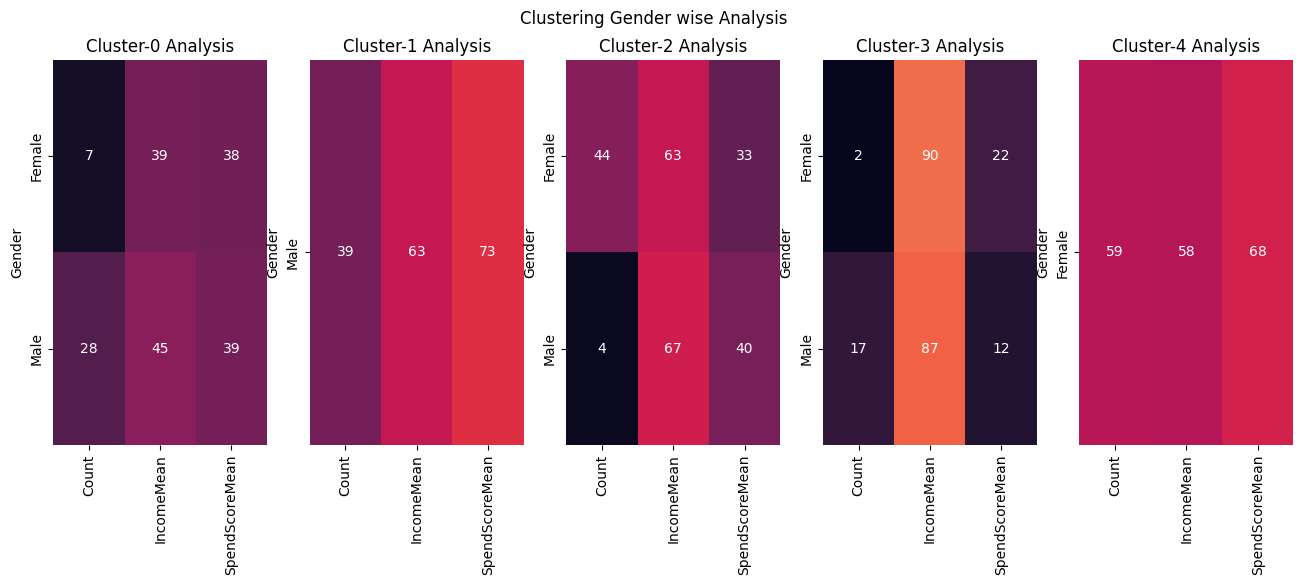

In [ ]:
fig,ax=plt.subplots(1,5,figsize=(16,5))

for cluster_val in sorted(df3.clusters.unique()):

    sns.heatmap(df3.loc[df3.clusters==cluster_val,:].groupby('Gender').agg({'clusters':'size','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).\
    rename(columns={'clusters':'Count','Annual Income (k$)':'IncomeMean','Spending Score (1-100)':'SpendScoreMean'})\
                .fillna(0).round(),annot=True,fmt='g',ax=ax[cluster_val],cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)+' Analysis'
    ax[cluster_val].set_title(titl)


plt.suptitle('Clustering Gender wise Analysis')

plt.show()

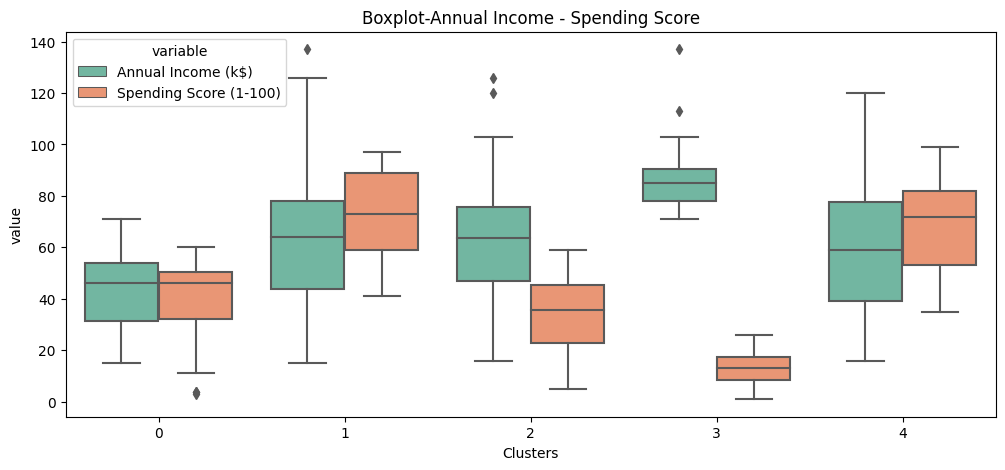

In [ ]:
plt.figure(figsize=(12,5))

sns.boxplot(x='clusters',y='value',hue='variable',\
            data=pd.melt(df3,id_vars=['clusters'],value_vars=['Annual Income (k$)','Spending Score (1-100)']),\
           palette="Set2")
plt.xlabel("Clusters")
plt.title("Boxplot-Annual Income - Spending Score")
plt.show()